# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


# 1.(33%) Péndulo
 I) El período de un péndulo de longitud l que oscila en un ángulo grande α está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo en pequeñas amplitudes. Cualquier evaluación numérica de la integral tal como está fallaría (explique por qué). Si cambiamos la variable escribiendo:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
Nosotros podemos obtener:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

///
que es una integral de buen comportamiento. Escriba un programa para usar la integral anterior para calcular la relación T/T0 para amplitudes integrales 0∘≤α≤90∘. Genere estos valores como un marco de datos de pandas que muestra la amplitud en grados y radianes, así como T/T0, y haga un gráfico con las dos columnas. Explique el resultado cuando α=0.

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






##PUNTO 1

In [123]:
import numpy as np
from numbers import Integral
import scipy.integrate as integrate
import pandas as pd
import matplotlib.pyplot as plt

Data=[]

for i in range(0,91,5):
  alpha = np.radians(i)

  def Integral(phi):
    pro=1-np.sin(alpha/2)**2 * np.sin(phi)
    return 1/np.sqrt(pro)

  T = (2/np.pi) * integrate.quad(Integral, 0, np.pi/2)[0]
  Data.append([T,alpha,np.degrees(alpha)])

Data =np.array(Data)
data1 = pd.DataFrame(Data,columns=['T/T0', 'Alfa radianes', 'Alfa en grados'])
print(data1)

        T/T0  Alfa radianes  Alfa en grados
0   1.000000       0.000000             0.0
1   1.000606       0.087266             5.0
2   1.002429       0.174533            10.0
3   1.005478       0.261799            15.0
4   1.009772       0.349066            20.0
5   1.015337       0.436332            25.0
6   1.022206       0.523599            30.0
7   1.030421       0.610865            35.0
8   1.040034       0.698132            40.0
9   1.051107       0.785398            45.0
10  1.063711       0.872665            50.0
11  1.077933       0.959931            55.0
12  1.093873       1.047198            60.0
13  1.111645       1.134464            65.0
14  1.131386       1.221730            70.0
15  1.153251       1.308997            75.0
16  1.177425       1.396263            80.0
17  1.204120       1.483530            85.0
18  1.233588       1.570796            90.0


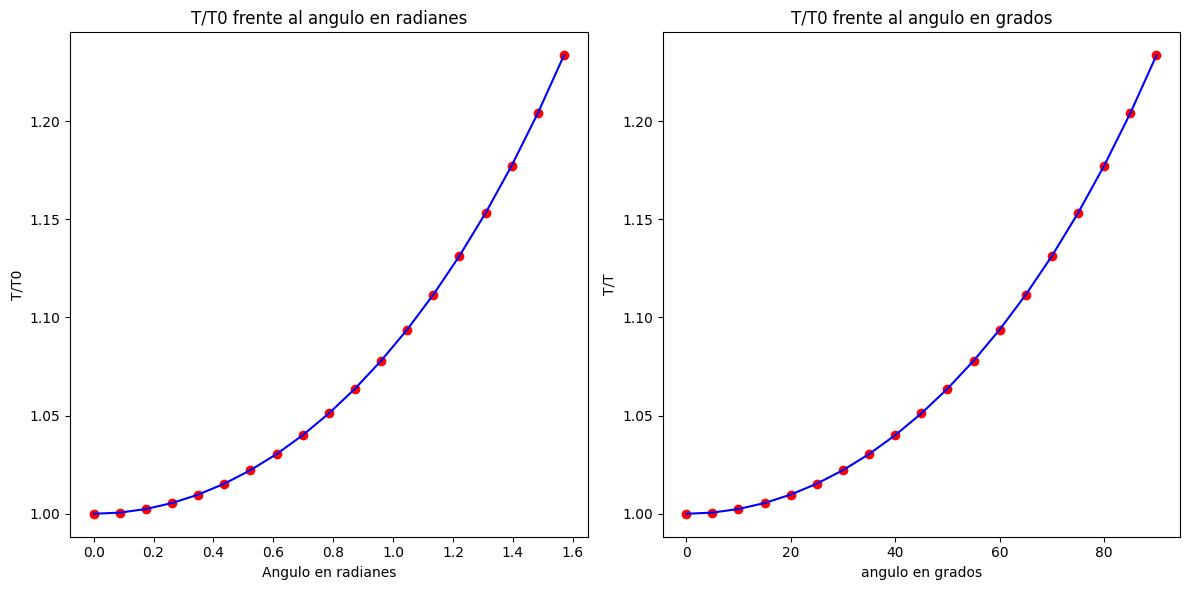

In [124]:

fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].plot( data1['Alfa radianes'],data1['T/T0'],'o', color='red')
axes[0].plot( data1['Alfa radianes'],data1['T/T0'], color='blue')
axes[0].set_ylabel('T/T0')
axes[0].set_xlabel('Angulo en radianes')
axes[0].set_title('T/T0 frente al angulo en radianes')

axes[1].plot( data1['Alfa en grados'],data1['T/T0'],'o',color= 'r')
axes[1].plot( data1['Alfa en grados'],data1['T/T0'],color= 'b')
axes[1].set_ylabel('T/T')
axes[1].set_xlabel('angulo en grados')
axes[1].set_title('T/T0 frente al angulo en grados')

plt.tight_layout()
plt.show()

¿Por qué fala la integral?

Como los métodos numéricos de integración funcionan evaluando la función en puntos específicos del intervalo, tener valores muy grandes en un extremo puede causar pérdida de precisión o errores en la evaluación numérica.

En nuestro caso el integrando tiene un comportamiento singular cerca de $\theta = \alpha$

In [125]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline



url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.10
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.20
4  1884        -0.28       -0.24


##PUNTOS 2.1 Y 2.2

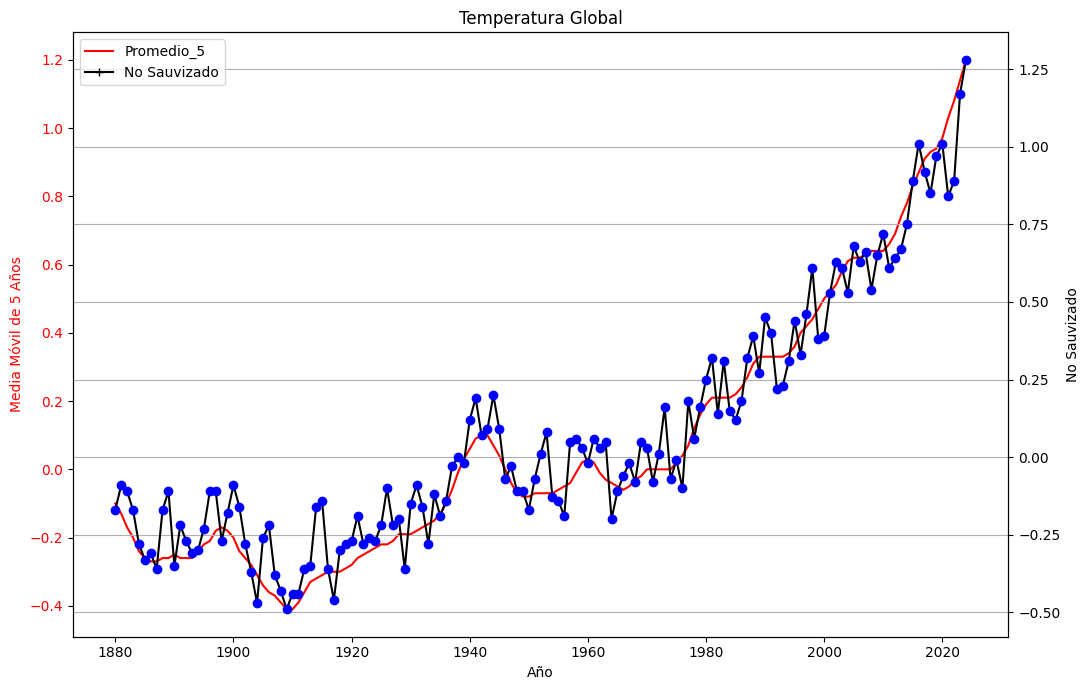

In [126]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(11, 7))

ax1.plot(data['Año'], data['Promedio_5'], linestyle='-', color='red', label='Promedio_5')
ax1.set_xlabel('Año')
ax1.set_ylabel('Media Móvil de 5 Años', color='red')
ax1.tick_params('y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(data['Año'], data['NoSauvizado'], marker='+', linestyle='-', color='black', label='No Sauvizado')
ax2.plot(data['Año'], data['NoSauvizado'],'o', color='b')
ax2.set_ylabel('No Sauvizado', color='black')
ax2.tick_params('y')


#titulo y leyenda
plt.title('Temperatura Global')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.grid()
plt.show()

#punto 2.3


CONCLUSIONES: Entre 1880 y 1935 se evidencia una disminucion en la temperatura global para luego volver a la normalidad. Posteriormente se tiene tener un gran aumento de la temperatura global  hasta 2024, con ciertos picos negativos, pero a nivel general, la temperatura tiende a aumentar.



##PUNTO 2.4

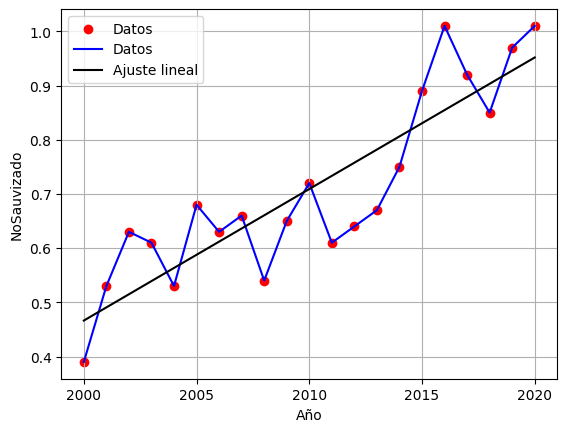

In [130]:
datanew= data.iloc[-25:-4]
x1= datanew['Año'].values
y1= datanew['NoSauvizado'].values

def lineal(x, m, b):
     return m * x + b

def lineal(x, m, b):
     return m * x + b

params, covariance = curve_fit(lineal, x1, y1)
m, b = params         #parametros de la funcion cuadratica asociada a nuestros puntos

x_fit = np.linspace(min(x1), max(x1), 100)  # Generamos puntos para la línea de ajuste
y_fit = lineal(x_fit,m,b)
Tick= np.linspace(2000,2020,5)

plt.xticks(Tick)
plt.scatter(x1, y1, label='Datos', color='r')
plt.plot(x1, y1, label='Datos', color='b')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='black')  # Graficamos la línea de ajuste
plt.xlabel('Año')
plt.ylabel('NoSauvizado')
plt.legend()
plt.grid(True)
plt.show()

##Punto 2.5

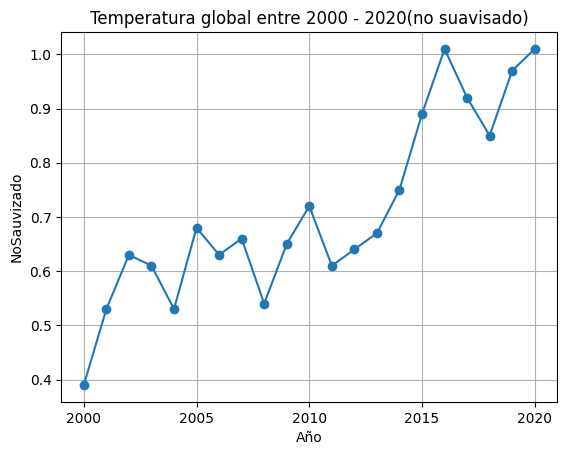

In [131]:
plt.plot(x1, y1, 'o-')

tic= np.linspace(2000,2020,5)
plt.xticks(tic)

plt.xlabel('Año')
plt.ylabel('NoSauvizado')
plt.title('Temperatura global entre 2000 - 2020(no suavisado)')
plt.grid(True)
plt.show()

INterpolacion 2000-2020


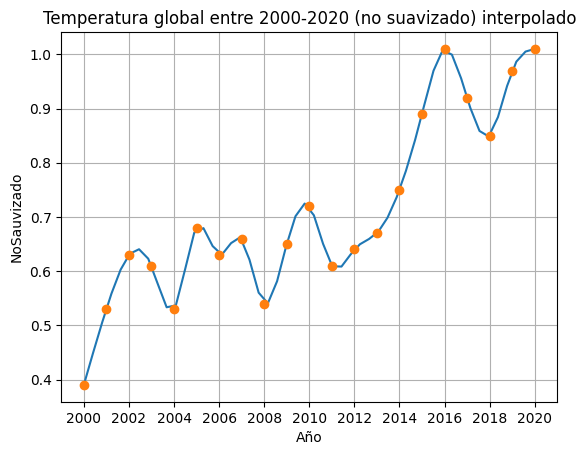

In [132]:
g= CubicSpline(x1,y1,bc_type='natural')

x2= np.linspace(x1[0],x1[-1])
y2= g(x2)

xtic=[]
for i in range(0,len(x1),2):
  xtic.append(x1[i])

plt.plot(x2,y2)
plt.plot(x1,y1,'o')
plt.xticks(xtic)
plt.xlabel('Año')
plt.ylabel('NoSauvizado')
plt.title('Temperatura global entre 2000-2020 (no suavizado) interpolado')
plt.grid(True)
plt.show()

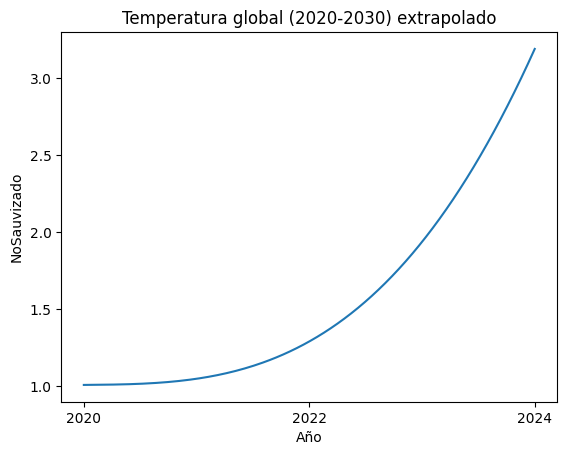

In [86]:
x3= np.linspace(2020,2024, 200)
y3= g(x3)

xtic2= np.linspace(2020,2024,3)

plt.plot(x3,y3)
plt.xlabel('Año')
plt.xticks(xtic2)
plt.ylabel('NoSauvizado')
plt.title('Temperatura global (2020-2030) extrapolado')
plt.show()

#Punto 2.6
¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.



RESPUESTA:
Considero mejor, la interpolacion en este caso, dado que el comportamiento de la grafica no se parece a ninguna funcion conocida normalmente, dadas las oscillaciones presentadas. Por otro lado, la interpolacion nos genera una funcion distinta para cada par de puntos(años) de una forma mas suave y que realmente se parece al comportamiento de la grafica.

##Punto 2.7
¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

RESPUESTA:
Dado el comportamiento de la grafica, se podria esperar que la temperatura anomala vaya en crecimiento entre el actual año y el año 2030, con ciertas variaciones negaticas (por la tendencia a picos negativos cada cierto tiempo en la grafica)

# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

##punto 3.a  y  3.b

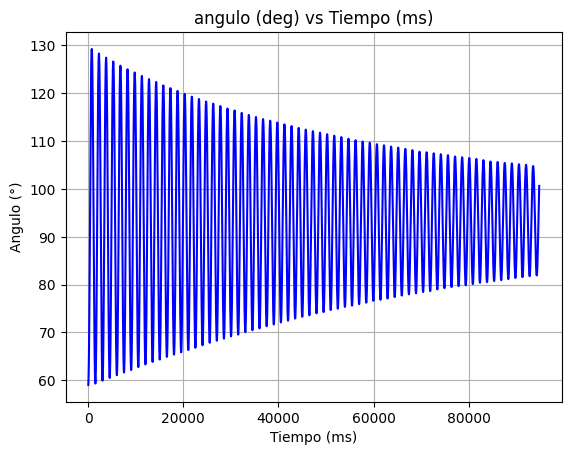

In [134]:
Url='https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv'
data= pd.read_csv(Url,sep=';', decimal=',')
data.columns=["Tiempo (ms)", "AnguloDeg"]
data.insert(2,'AnguloRad', np.radians(data['AnguloDeg']))

plt.plot((data['Tiempo (ms)']),data['AnguloDeg'],"b-")
plt.xlabel('Tiempo (ms)')
plt.ylabel('Angulo (°)')
plt.title('angulo (deg) vs Tiempo (ms)')
plt.grid(True)
plt.show()

##¿Qué puede concluir respecto al movimiento del pendulo?

El pendulo oscilara barriendo angulos cada vez menores de un lado a otro, con la tendencia a que despues de un tiempo t, dejera de barrer angulos

#Punto 3.c

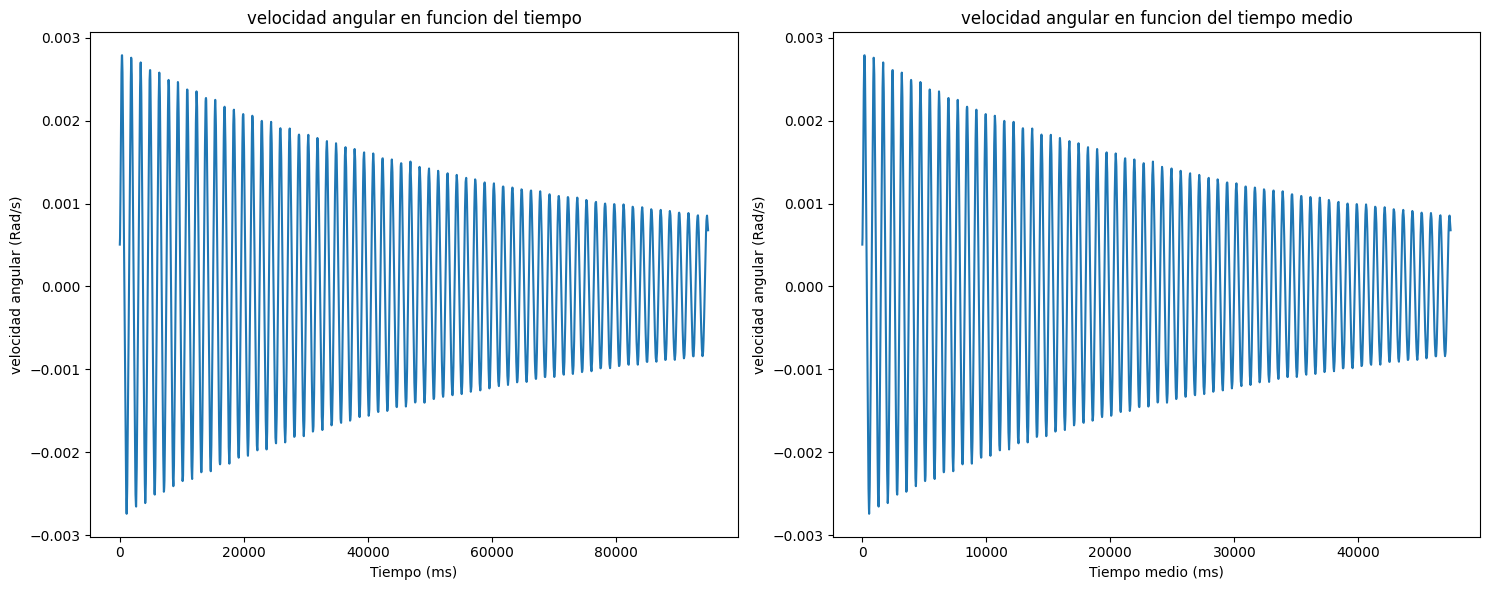

In [135]:
v_a =np.gradient(data['AnguloRad'],data['Tiempo (ms)'])

t_medio= np.zeros(len(data['Tiempo (ms)']))

for i in range(len(data['Tiempo (ms)'])):
  t_medio[i]= np.mean(data['Tiempo (ms)'][0:i+1])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(data['Tiempo (ms)'], v_a, linestyle='-')
axes[0].set_xlabel('Tiempo (ms)')
axes[0].set_ylabel('velocidad angular (Rad/s)')
axes[0].set_title('velocidad angular en funcion del tiempo')

axes[1].plot(t_medio, v_a, linestyle='-')
axes[1].set_xlabel('Tiempo medio (ms)')
axes[1].set_ylabel('velocidad angular (Rad/s)')
axes[1].set_title('velocidad angular en funcion del tiempo medio')

plt.tight_layout()
plt.show()

##Punto 3.d

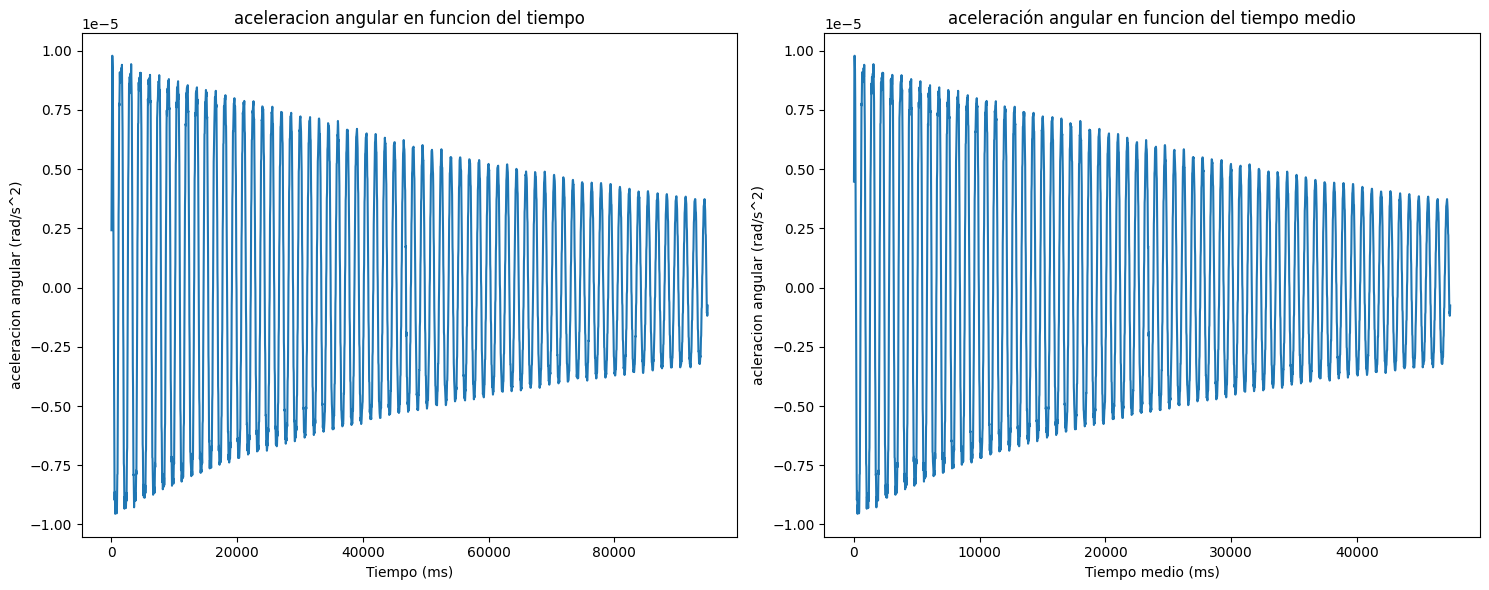

In [97]:
AC_a =np.gradient(v_a,data['Tiempo (ms)'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(data['Tiempo (ms)'], AC_a, linestyle='-')
axes[0].set_xlabel('Tiempo (ms)')
axes[0].set_ylabel('aceleracion angular (rad/s^2)')
axes[0].set_title('aceleracion angular en funcion del tiempo')

axes[1].plot(t_medio, AC_a, linestyle='-')
axes[1].set_xlabel('Tiempo medio (ms)')
axes[1].set_ylabel('acleracion angular (rad/s^2)')
axes[1].set_title('aceleración angular en funcion del tiempo medio')

plt.tight_layout()
plt.show()

#Bonus

(0.0, 2.0)

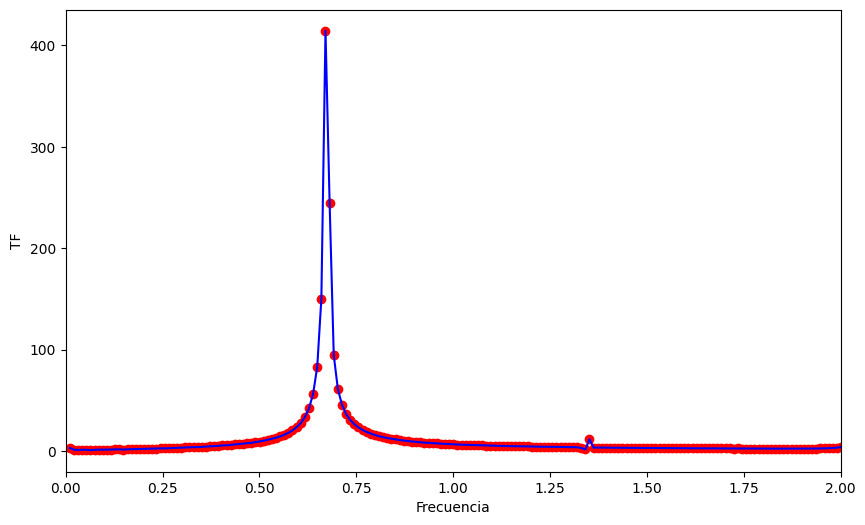

In [117]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
tf = fft(data['AnguloRad'].values)
T = 33E-3
N = len(data['Tiempo (ms)'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o",color='red')
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]), 'blue')
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

Frecuencia máxima: 0.6710890675883064


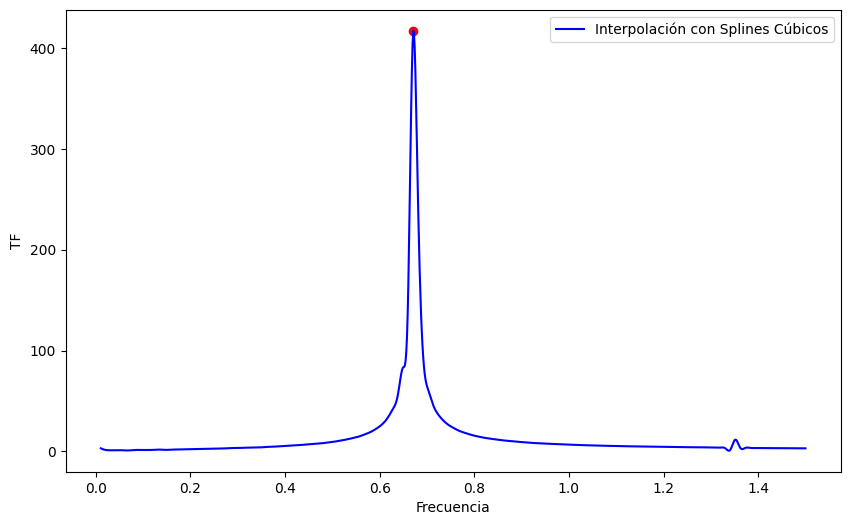

In [121]:
from scipy.interpolate import CubicSpline

plt.figure(figsize=(10,6))
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

x_new = np.linspace(xf[1], 1.5, 1000)
y_new = cs(x_new)

#valor máximo de frecuencia_---------------
max_ind = np.argmax(y_new)
frec_max = x_new[max_ind]
print("Frecuencia máxima:", frec_max)
#----------------------------------------

plt.scatter(frec_max,y_new[max_ind], color='red')
plt.plot(x_new, y_new, '-', color='blue', label='Interpolación con Splines Cúbicos')
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.legend()
plt.show()
